In [1]:
!pip install seaborn --quiet
!pip install scikit-learn --quiet
#!pip install tensorflow --quiet
!pip install keras --quiet
!pip install matplotlib --quiet
!pip install pandas --quiet
!pip install numpy --quiet
!pip install torch --quiet
!pip install imbalanced-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00


In [2]:
# Importa el módulo 'drive' desde la librería 'google.colab' para interactuar con Google Drive
from google.colab import drive

# Monta el sistema de archivos de Google Drive en la ruta especificada '/content/drive/'
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Importa el módulo 'sys' para interactuar con el sistema, como las rutas de búsqueda de módulos
import sys

# Agrega la ruta especificada al listado de directorios donde Python busca módulos
# Esto permite importar módulos personalizados desde Google Drive, en este caso, desde la carpeta 'ML_Aprendizaje_Profundo/2025-espectro-banano'
sys.path.append('/content/drive/MyDrive/ML_Aprendizaje_Profundo/2025-espectro-banano/')

# Importa el módulo 'os' para interactuar con el sistema operativo, como manejo de archivos y directorios
import os

# Importa la librería 'pandas' con el alias 'pd' para manipulación y análisis de datos en estructuras como DataFrames
import pandas as pd

# Importa la librería 'numpy' con el alias 'np' para operaciones numéricas y manejo de arreglos
import numpy as np

# Importa un módulo personalizado 'dataFunction3' con el alias 'datF', probablemente con funciones definidas por el usuario
import dataFunction3 as datF

# Importa un módulo personalizado 'dataFunction3' con el alias 'datF', probablemente con funciones definidas por el usuario
import dataFunction4 as datF4

# Importa 'pyplot' de la librería 'matplotlib' con el alias 'plt' para crear visualizaciones como gráficos
import matplotlib.pyplot as plt

# Importa la librería 'seaborn' con el alias 'sns' para visualizaciones estadísticas avanzadas y estilizadas
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.manifold import TSNE

# Aplica el tema predeterminado de 'seaborn' para estilizar las visualizaciones generadas
sns.set_theme()

In [4]:
# Nombre del archivo CSV a leer
file = 'newdatos-Junio14-dataset.csv'

# Ruta base en Google Drive donde está el archivo
path = r"/content/drive/MyDrive/ML_Aprendizaje_Profundo/2025-espectro-banano/"

# Reemplaza barras invertidas por diagonales (redundante aquí)
path = path.replace('\\', '/')

# Combina la ruta y el nombre del archivo
file = os.path.join(path, file)

# Lee el CSV con separador ';' y lo carga en un DataFrame
df = pd.read_csv(file, sep=';')

In [5]:
# Recibe el DataFrame 'df' como parámetro para identificar o procesar las clases/categorías únicas en los datos
datF.clasesDiferentes(df)


Clases diferentes en la columna dpi:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Clases diferentes en la columna Sana:
[ 1  0 -1]
Donde:

1 es Sana
0 es Fusarium
-1 es E_Hidrico

Clases diferentes en la columna Tratamiento:
['Control' 'Ralstonia' 'Fusarium' 'E_Hidrico' 'Ral_Fus' 'Ral_EH'
 'Fus_EH_Ral' 'Fus_EH']



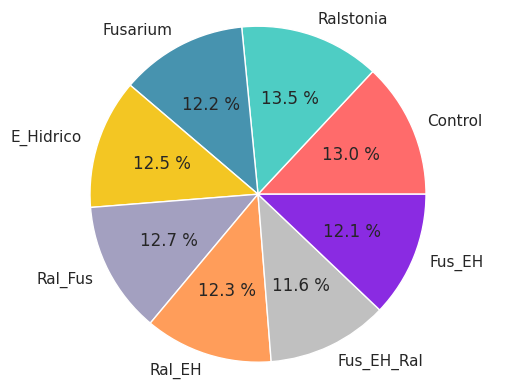

In [6]:
# visualiza la distribución de los datos por la columna "Sana" y se cuenta cuántas veces aparece cada clase usando la columna "dpi"
# Se agrupan los datos por la columna "Tratamiento" y se cuenta cuántas veces aparece cada clase usando la columna "dpi"
ddf = df[["Tratamiento", "dpi"]].groupby("Tratamiento").count()
# Se reestructura el DataFrame para que sea un arreglo plano de 3 elementos (uno por clase)
ddf = ddf.values.reshape(
    8,
)

# Nombres asignados a cada clase en el gráfico de pastel (en orden acorde a la codificación en "Sana")
nombres = ['Control', 'Ralstonia', 'Fusarium', 'E_Hidrico', 'Ral_Fus', 'Ral_EH', 'Fus_EH_Ral', 'Fus_EH']
# Colores personalizados para cada segmento del gráfico
colores = [
  "#FF6B6B", # Rojo Coral
  "#4ECDC4", # Turquesa
  "#4793AF", # Azul Acero
  "#F3C623", # Amarillo Sol
  "#A3A0C0", # Lavanda Suave
  "#FF9D5A", # Naranja Durazno
  "#C0C0C0", # Gris Plata
  "#8A2BE2"  # Azul Violeta
]
# Se genera el gráfico de pastel con porcentajes y colores definidos
plt.pie(ddf, labels=nombres, autopct="%0.1f %%", colors=colores)

# Asegura que el gráfico tenga forma circular
plt.axis("equal")

# Muestra el gráfico
plt.show()

In [18]:
# Eliminar Sana
'''
Razón: La tabla cruzada muestra una fuerte correlación entre Tratamiento y Sana
(por ejemplo, Control y Ralstonia son siempre Sana = 1, Fus_EH es siempre Fusarium = 0).
Incluir Tratamiento causaría data leakage
 '''
df = df.drop(columns=['Sana'])

KeyError: "['Sana'] not found in axis"

In [19]:
# Etiquetado de 'Tratamiento' en 2 categorías
def map_tratamiento(t):
    if t == 'Control':
        return 0            # 0 para "Sana" (solo Control)
    else:
        return 1            # 1 para "Enfermas" (todas las demás, incluyendo E_Hidrico, Ralstonia, Fusarium, etc.)

df['Tratamiento_lbl'] = df['Tratamiento'].apply(map_tratamiento)

In [20]:
print("Nueva distribución de clases en 'Tratamiento_lbl':")
print(df['Tratamiento_lbl'].value_counts())
print("\n")
print( '0: ' "Sana (Control)\n"
        '1: ' "Enfermas (todas las demás)")

Nueva distribución de clases en 'Tratamiento_lbl':
Tratamiento_lbl
1    3076
0     461
Name: count, dtype: int64


0: Sana (Control)
1: Enfermas (todas las demás)


In [21]:
# Separar características y variable objetivo
# Ahora 'Tratamiento' también se elimina de X, ya que su versión mapeada 'Tratamiento_lbl' es la nueva 'y'.
X = df.drop(columns=['Tratamiento', 'Tratamiento_lbl'])
y = df['Tratamiento_lbl'] # ¡Nueva variable objetivo!

In [22]:
# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=87, stratify=y
)

print(f"train size: {y_train.shape[0]}\n test size: {y_test.shape[0]}")

train size: 2829
 test size: 708


In [23]:
# --- Parámetros de las clases para el MLP y la matriz de confusión ---
# The model is currently trained on 2 classes (Sana and Enfermas)
num_classes = 2
label_names = ['Sana', 'Enfermas'] # Update labels to match the 2 classes

In [24]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes=2): # num_classes es 2
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes) # La capa de salida debe coincidir con num_classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [25]:
# Función MixUp
def mixup_data(x, y, alpha=1.0):
    '''Genera datos y etiquetas mezcladas con MixUp'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).cpu() # Mover a CPU para MixUp, ya que no se asume GPU siempre

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Función de entrenamiento con MixUp
def entrenar_mlp_mixup(X_train, y_train, X_test, y_test, epochs=200, lr=0.001, alpha=0.4):
    input_dim = X_train.shape[1]
    model = MLP(input_dim, num_classes=num_classes).cpu() # num_classes es 2
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss(reduction='none')

    if isinstance(X_train, pd.DataFrame):
        X_train = torch.FloatTensor(X_train.values).cpu()
    else:
        X_train = torch.FloatTensor(X_train).cpu()

    if isinstance(y_train, pd.Series):
        y_train = torch.LongTensor(y_train.values).cpu()
    else:
        y_train = torch.LongTensor(y_train).cpu()


    if isinstance(X_test, pd.DataFrame):
        X_test = torch.FloatTensor(X_test.values).cpu()
    else:
        X_test = torch.FloatTensor(X_test).cpu()

    if isinstance(y_test, pd.Series):
        y_test = torch.LongTensor(y_test.values).cpu()
    else:
        y_test = torch.LongTensor(y_test).cpu()


    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        mixed_x, y_a, y_b, lam = mixup_data(X_train, y_train, alpha)
        outputs = model(mixed_x)

        loss = lam * criterion(outputs, y_a) + (1 - lam) * criterion(outputs, y_b)
        loss = loss.mean()

        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                test_outputs = model(X_test)
                preds = torch.argmax(test_outputs, dim=1)
                acc = (preds == y_test).float().mean()
                print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f} - Test Acc: {acc.item():.4f}")

    # Evaluación final
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        preds = torch.argmax(test_outputs, dim=1).cpu().numpy()
        y_test_cpu = y_test.cpu().numpy()

        cm = confusion_matrix(y_test_cpu, preds)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
        disp.plot(cmap="Blues")
        plt.title("Matriz de Confusión - Test")
        plt.show()

        acc_final = accuracy_score(y_test_cpu, preds)
        print(f"\nAccuracy final en Test: {acc_final:.4f}")


=== Entrenamiento SOLO MixUp (2 clases) ===
Epoch 10/200 - Loss: 0.3782 - Test Acc: 0.8701
Epoch 20/200 - Loss: 0.3785 - Test Acc: 0.8701
Epoch 30/200 - Loss: 0.3728 - Test Acc: 0.8701
Epoch 40/200 - Loss: 0.3755 - Test Acc: 0.8701
Epoch 50/200 - Loss: 0.3711 - Test Acc: 0.8701
Epoch 60/200 - Loss: 0.3751 - Test Acc: 0.8701
Epoch 70/200 - Loss: 0.3612 - Test Acc: 0.8701
Epoch 80/200 - Loss: 0.3819 - Test Acc: 0.8701
Epoch 90/200 - Loss: 0.3606 - Test Acc: 0.8701
Epoch 100/200 - Loss: 0.3849 - Test Acc: 0.8701
Epoch 110/200 - Loss: 0.3775 - Test Acc: 0.8701
Epoch 120/200 - Loss: 0.3551 - Test Acc: 0.8701
Epoch 130/200 - Loss: 0.3544 - Test Acc: 0.8701
Epoch 140/200 - Loss: 0.3563 - Test Acc: 0.8701
Epoch 150/200 - Loss: 0.3533 - Test Acc: 0.8701
Epoch 160/200 - Loss: 0.3594 - Test Acc: 0.8701
Epoch 170/200 - Loss: 0.3721 - Test Acc: 0.8701
Epoch 180/200 - Loss: 0.3776 - Test Acc: 0.8701
Epoch 190/200 - Loss: 0.3408 - Test Acc: 0.8701
Epoch 200/200 - Loss: 0.3648 - Test Acc: 0.8701


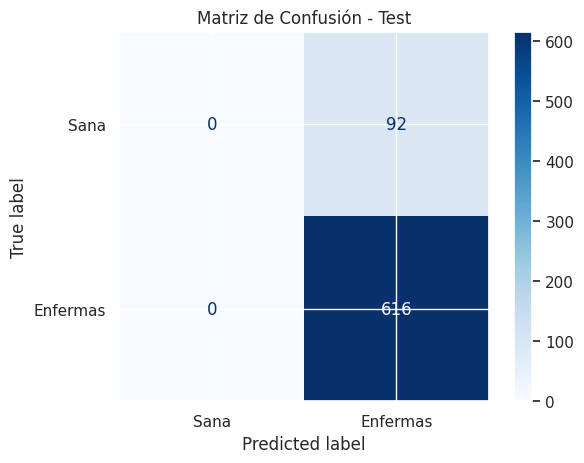


Accuracy final en Test: 0.8701


In [27]:
# Solo MixUp
print("\n=== Entrenamiento SOLO MixUp (2 clases) ===")
entrenar_mlp_mixup(X_train, y_train, X_test, y_test, epochs=200, lr=0.001, alpha=0.4)



=== Entrenamiento MixUp + SMOTE (2 clases) ===
Epoch 10/200 - Loss: 0.6631 - Test Acc: 0.4322
Epoch 20/200 - Loss: 0.6387 - Test Acc: 0.3658
Epoch 30/200 - Loss: 0.6062 - Test Acc: 0.6215
Epoch 40/200 - Loss: 0.6346 - Test Acc: 0.5621
Epoch 50/200 - Loss: 0.5695 - Test Acc: 0.6864
Epoch 60/200 - Loss: 0.5672 - Test Acc: 0.5692
Epoch 70/200 - Loss: 0.5583 - Test Acc: 0.6992
Epoch 80/200 - Loss: 0.5815 - Test Acc: 0.6314
Epoch 90/200 - Loss: 0.6301 - Test Acc: 0.7090
Epoch 100/200 - Loss: 0.5768 - Test Acc: 0.6850
Epoch 110/200 - Loss: 0.5344 - Test Acc: 0.6427
Epoch 120/200 - Loss: 0.5116 - Test Acc: 0.7500
Epoch 130/200 - Loss: 0.6013 - Test Acc: 0.6864
Epoch 140/200 - Loss: 0.5361 - Test Acc: 0.6751
Epoch 150/200 - Loss: 0.5200 - Test Acc: 0.6384
Epoch 160/200 - Loss: 0.5880 - Test Acc: 0.6992
Epoch 170/200 - Loss: 0.4904 - Test Acc: 0.7260
Epoch 180/200 - Loss: 0.5817 - Test Acc: 0.7345
Epoch 190/200 - Loss: 0.4865 - Test Acc: 0.7613
Epoch 200/200 - Loss: 0.4846 - Test Acc: 0.6667


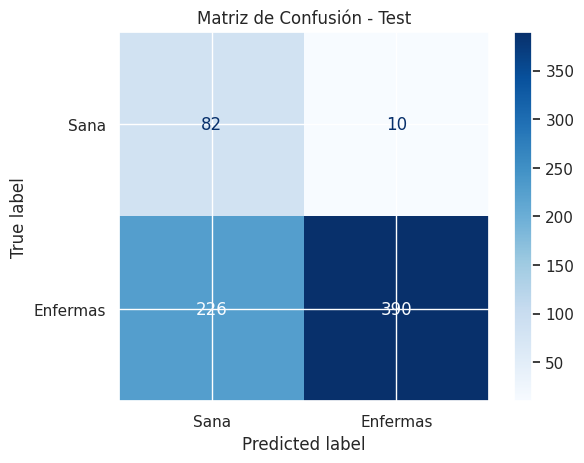


Accuracy final en Test: 0.6667


In [28]:
# MixUp + SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\n=== Entrenamiento MixUp + SMOTE (2 clases) ===")
entrenar_mlp_mixup(X_train_smote, y_train_smote, X_test, y_test, epochs=200, lr=0.001, alpha=0.4)



=== MixUp + DeepSMOTE (con Autoencoder) (2 clases) ===
Entrenando Autoencoder con 100 épocas...
Autoencoder Epoch 20/100, Loss: 0.1478
Autoencoder Epoch 40/100, Loss: 0.0413
Autoencoder Epoch 60/100, Loss: 0.0291
Autoencoder Epoch 80/100, Loss: 0.0230
Autoencoder Epoch 100/100, Loss: 0.0156
Epoch 10/200 - Loss: 0.6828 - Test Acc: 0.8701
Epoch 20/200 - Loss: 0.6714 - Test Acc: 0.2881
Epoch 30/200 - Loss: 0.6350 - Test Acc: 0.4562
Epoch 40/200 - Loss: 0.6253 - Test Acc: 0.4548
Epoch 50/200 - Loss: 0.6242 - Test Acc: 0.4407
Epoch 60/200 - Loss: 0.6289 - Test Acc: 0.4576
Epoch 70/200 - Loss: 0.6622 - Test Acc: 0.5169
Epoch 80/200 - Loss: 0.6389 - Test Acc: 0.5240
Epoch 90/200 - Loss: 0.6073 - Test Acc: 0.6257
Epoch 100/200 - Loss: 0.6398 - Test Acc: 0.4915
Epoch 110/200 - Loss: 0.6099 - Test Acc: 0.6511
Epoch 120/200 - Loss: 0.6605 - Test Acc: 0.5071
Epoch 130/200 - Loss: 0.6028 - Test Acc: 0.5268
Epoch 140/200 - Loss: 0.5843 - Test Acc: 0.6554
Epoch 150/200 - Loss: 0.6312 - Test Acc: 0.6

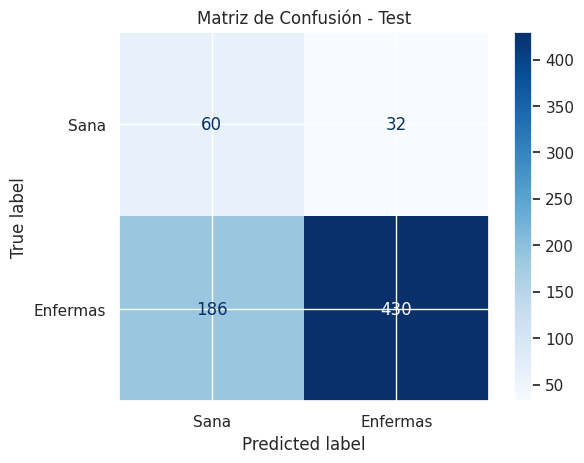


Accuracy final en Test: 0.6921


In [29]:
# MixUp + Autoencoder ()
# Definición del Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim), # Capa latente
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            # nn.Sigmoid() # Usar si los datos están normalizados entre 0 y 1 (imágenes)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Función para entrenar el Autoencoder
def train_autoencoder(X_data, input_dim, latent_dim, epochs=100, lr=1e-3):
    autoencoder = Autoencoder(input_dim, latent_dim).cpu() # Mover a CPU
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=lr)
    criterion = nn.MSELoss() # Pérdida de reconstrucción, MSE para datos continuos

    X_tensor = torch.tensor(X_data.values, dtype=torch.float32, device='cpu') # Mover a CPU

    print(f"Entrenando Autoencoder con {epochs} épocas...")
    for epoch in range(epochs):
        autoencoder.train()
        optimizer.zero_grad()
        outputs = autoencoder(X_tensor)
        loss = criterion(outputs, X_tensor)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 20 == 0:
            print(f"Autoencoder Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    return autoencoder

# Función para aplicar DeepSMOTE
def apply_deep_smote(X_train_df, y_train_series, autoencoder_model, num_classes):
    # Obtener representaciones latentes de las muestras originales
    autoencoder_model.eval()
    with torch.no_grad():
        X_train_original_tensor = torch.tensor(X_train_df.values, dtype=torch.float32, device='cpu') # Mover a CPU
        X_latent_original = autoencoder_model.encoder(X_train_original_tensor).cpu().numpy() # Traer a CPU para SMOTE

    # Aplicar SMOTE en el espacio latente
    sm_latent = SMOTE(random_state=42)
    X_latent_resampled, y_resampled = sm_latent.fit_resample(X_latent_original, y_train_series)

    # Decodificar las nuevas muestras sintéticas del espacio latente
    X_latent_resampled_tensor = torch.tensor(X_latent_resampled, dtype=torch.float32, device='cpu') # Mover a CPU
    with torch.no_grad():
        X_deeps_synthetic = autoencoder_model.decoder(X_latent_resampled_tensor).cpu().numpy() # Traer a CPU

    # Asegurarse de que X_deeps_synthetic tenga la misma forma de DataFrame que se espera
    X_deeps_synthetic_df = pd.DataFrame(X_deeps_synthetic, columns=X_train_df.columns)

    return X_deeps_synthetic_df, y_resampled


print("\n=== MixUp + DeepSMOTE (con Autoencoder) (2 clases) ===")

# --- Configuración del Autoencoder ---
latent_dim = 16 # Dimensión del espacio latente (ajusta según tus datos, menor que input_dim)
ae_epochs = 100 # Épocas para entrenar el autoencoder
ae_lr = 1e-3  # Learning rate para el autoencoder

# 1. Entrenar el Autoencoder con el dataset de entrenamiento original
# Es importante que el autoencoder aprenda del dataset original para obtener buenas representaciones
autoencoder = train_autoencoder(X_train, X_train.shape[1], latent_dim, ae_epochs, ae_lr)

# 2. Aplicar DeepSMOTE
# Pasamos X_train y y_train (el dataset de entrenamiento original) para el proceso de DeepSMOTE
Xtr_deeps, ytr_deeps = apply_deep_smote(X_train, y_train, autoencoder, num_classes)


# 3. Entrenar el MLP con MixUp usando los datos de DeepSMOTE
# El valor de alpha se mantiene para el experimento MixUp
entrenar_mlp_mixup(Xtr_deeps, ytr_deeps, X_test, y_test, epochs=200, lr=0.001, alpha=0.4)
